[2024-08-02 Fiddler](https://thefiddler.substack.com/p/can-you-hack-the-olympics)
====================
Let the skate order be A, B, C, D.

Skater D can only win by being in first place after she skates.

Let's just brute force it.

In [1]:
def leader(short, free):
    standings = [(short.index(p)/2 + free.index(p),free.index(p),p) for p in free]
    standings.sort()
    return standings[0][2]

def brute_force(n):
    count = 0
    for short in Permutations(n).list():
        for free in Permutations(n).list():
            winner = leader(short, free)
            notLeader = False
            for skater in [winner..n]:
                if winner != leader(short, [p for p in filter(lambda x: x <= skater,free)]):
                    notLeader = True
                    break
            if notLeader:
                count = count+1
    return count/factorial(n)^2
(brute_force(4),numerical_approx(brute_force(4)))

(1/24, 0.0416666666666667)

The probability is 1/24, about 4.167%.

Extra credit
------------
Brute force some values to see what it looks like.

In [2]:
for n in [1..5]:
    p = brute_force(n)
    print(n,p,numerical_approx(p))

1 0 0.000000000000000
2 0 0.000000000000000
3 0 0.000000000000000
4 1/24 0.0416666666666667
5 29/450 0.0644444444444444


Brute force becomes too slow for more than 5 skaters.  Let's look at the 24 cases with 4 skaters.

In [3]:
def examine(n):
    for short in Permutations(n):
        for free in Permutations(n):
            finalStandings = [(short.index(p)/2 + free.index(p),free.index(p),p) for p in free]
            finalStandings.sort()
            winner = finalStandings[0][2]
            redundant = False
            for skater in [winner..n]:
                currentFree = [p for p in filter(lambda x: x <= skater,free)]
                currentStandings = [(short.index(p)/2 + currentFree.index(p),currentFree.index(p),p) for p in currentFree]
                currentStandings.sort()
                if winner != currentStandings[0][2]:
                    print(winner,skater,redundant,short,free,finalStandings,currentStandings, \
                          n == 4 and len(currentStandings) == 3 and \
                          short[0] == free[2] and short[0] == currentStandings[0][2] and short[0] == finalStandings[2][2] and \
                          short[1] == 4 and free[1] == 4 and finalStandings[1][2] == 4 and \
                          short[2] == free[3] and short[2] == currentStandings[2][2] and short[2] == finalStandings[3][2] and \
                          short[3] == winner and free[0] == winner and currentStandings[1][2] == winner)
                    redundant = True
examine(4)

3 3 False [1, 2, 4, 3] [3, 4, 1, 2] [(3/2, 0, 3), (2, 1, 4), (2, 2, 1), (7/2, 3, 2)] [(1, 1, 1), (3/2, 0, 3), (5/2, 2, 2)] False
2 2 False [1, 3, 4, 2] [2, 3, 1, 4] [(3/2, 0, 2), (3/2, 1, 3), (2, 2, 1), (4, 3, 4)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 3, 4, 2] [2, 3, 4, 1] [(3/2, 0, 2), (3/2, 1, 3), (3, 2, 4), (3, 3, 1)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 3, 4, 2] [2, 4, 1, 3] [(3/2, 0, 2), (2, 1, 4), (2, 2, 1), (7/2, 3, 3)] [(1, 1, 1), (3/2, 0, 2)] False
2 3 True [1, 3, 4, 2] [2, 4, 1, 3] [(3/2, 0, 2), (2, 1, 4), (2, 2, 1), (7/2, 3, 3)] [(1, 1, 1), (3/2, 0, 2), (5/2, 2, 3)] False
2 2 False [1, 3, 4, 2] [2, 4, 3, 1] [(3/2, 0, 2), (2, 1, 4), (5/2, 2, 3), (3, 3, 1)] [(1, 1, 1), (3/2, 0, 2)] False
3 3 False [1, 4, 2, 3] [3, 4, 1, 2] [(3/2, 0, 3), (3/2, 1, 4), (2, 2, 1), (4, 3, 2)] [(1, 1, 1), (3/2, 0, 3), (3, 2, 2)] True
2 2 False [1, 4, 3, 2] [2, 3, 1, 4] [(3/2, 0, 2), (2, 1, 3), (2, 2, 1), (7/2, 3, 4)] [(1, 1, 1), (3/2, 0, 2)] False
2 2 False [1, 4, 3, 2] [2, 3, 4, 1] [

I don't have any insights from looking at this.  6 of them are consistent with the 2002 Olympics scenario:
since Slutskaya skates last, there are 3!=6 ways the other 3 skaters can be ordered.

Let skater $n$ be the skater that finished $n$th in the free skate.  Let $S_n$ be her finish in the short program,
and $T_n$ be her skate order.  There are $N!^2$ possibilities.

With $S_n$ alone, we can determine the winner.  And, with $N!$ possiblities in the skate order, we can determine
the probability that some skater was ahead of the winner in the overall standings at some point.

Consider skaters $i$ and $j > i$.  If $S_i \le S_j$, then skater $j$ will never be ahead of skater $i$.  There are
$j - i - 1$ skaters between them in the free skate rankings, and $r$ of them, where $0 \le r \le j - i - 1$ have
not skated yet when both skaters $i$ and $j$ have finished skating.  The score differential between the two
is initially $j - i - r + S_j/2 - S_i/2$, and, when all skaters have finished skating, ends up at $j - i + S_j/2 - S_i/2$.
If the differential is greater than or equal to zero, skater $i$ is ahead.  If the differential is less than zero,
skater $j$ is ahead.  So if $r > j - i + S_j/2 - S_i/2 \ge 0$, then skater $i$ would initially be behind skater $j$,
but ultimately end up ahead of skater $j$, otherwise, their relative overall standings will not change.

### Probability of winning

The probability that skater $n$ finishes behind skater 1 is the probability that $n + S_n/2 \ge 1 + S_1/2$,
or $S_1 \le S_n + 2n - 2$.  There are $\min(N-1,S_n+2n-3)$ skaters out of $N-1$ (excluding skater $n$), so
the probability that skater $n$ finishes ahead of skater 1 is
$1 - \min(N-1,S_n+2n-3)/(N-1) = (N-1-\min(N-1,S_n+2n-3))/(N-1)$.

The probability that skater $n$ finishes behind skater 2, given that skater $n$ finishes ahead of skater 1,
is the probability that $n + S_n/2 \ge 2 + S_2/2$, or $S_2 \le S_n + 2n - 4$.  There are
$\min(N-2,S_n+2n-5)$ skaters out of $N-2$ (excluding skaters 1 and $n$), so the probability that skater $n$
finishes ahead of skater 2 is
$1 - \min(N-2,S_n+2n-5)/(N-2) = (N-2-\min(N-2,S_n+2n-5))/(N-2)$.

Continuing in the same vein up to skater $n-1$, the probability that skater $n$ finishes behind skater $i$,
where $i < n$, given that skater $n$ finishes ahead of skaters 1 through $i-1$, is the probability  that
$n + S_n/2 \ge i + S_i/2$, or $S_i \le S_n + 2n - 2i$.  There are
$\min(N-i,S_n+2n-2i-1)$ skaters out of $N-i$,
so the probability that skater $n$ finishes ahead of skater $i$ is
$1 - \min(N-i,S_n+2n-2i-1)/(N-i) = (N-i-\min(N-i,S_n+2n-2i-1))/(N-i)$.

The probability that skater $n$ finishes behind skater $n+1$, given that skater $n$ finishes ahead of
skaters 1 through $n-1$, is the probability that $n + S_n/2 > n+1 + S_{n+1}/2$, or $S_{n+1} < S_n - 2$.
There are $S_n-3$ skaters out of $N-n$, so the probability that skater $n$ finishes ahead of skater $n+1$
is $1 - \min(0,S_n-3)/(N-n) = (N-n-\min(0,S_n-3))/(N-n)$.

The probability that skater $n$ finishes behind of skater $n+2$, given that skater $n$ finishes ahead of
skaters 1 through $n-1$ and $n+1$, is the probability that $n + S_n/2 > n+2 + S_{n+2}/2$, or
$S_{n+2} < S_n - 4$.  There are $\max(0,S_n-5)$ skaters out of $N-n-1$, so the probability that skater $n$
finishes ahead of skater $n+2$ is $1 - \max(0,S_n-5)/(N-n-1) = (N-n-1-\max(0,S_n-5))/(N-n-1)$.

Continuing in the same vein up to skater $N$, the probability that skater $n$ finishes behind skater $n+i$,
given that skater $n$ finishes ahead of skaters 1 through $n-1$ and $n+1$ through $n+i-1$, is the
probability that $n+S_n/2 > n+i+S_{n+i}/2$, or $S_{n+i} < S_n-2i$.  There are $\max(0,S_n-2i-1)$ skaters
out of $N-n-i+1$, so the probability that skater $n$ finishes ahead of skater $n+i$ is
$1 - \max(0,S_n-2i-1)/(N-n-i+1) = (N-n-i+1-\max(0,S_n-2i-1))/(N-n-i+1)$.

Putting it together, the probability that the winner finished $S_n$th in the short program and $n$th in the
free skate is

$$\begin{aligned}
    W(N,n,S_n) &= \frac{1}{N}
    \left(\prod_{i=1}^{n-1} \frac{N-i-\min(N-i,S_n+2n-2i-1)}{N-i}\right)
        \prod_{i=1}^{N-n} \frac{N-n-i+1-\max(0,S_n-2i-1)}{N-n-i+1} \\
    &= \frac{\left(\prod_{i=1}^{n-1} \left(N-i-\min(N-i,S_n+2n-2i-1)\right)\right)
                \prod_{i=1}^{N-n} \left(N-n-i+1-\max(0,S_n-2i-1)\right)}
            {N!} \\
\end{aligned}$$

In [4]:
%display latex
i, N, n, S_n = var('i N n S_n')
assume(N, "integer")
assume(n, "integer")
assume(S_n, "integer")
assume(N > 1)
assume(n >= 1)
assume(n <= N)
assume(S_n >= 1)
assume(S_n <= N)
W1(N,n,S_n) = product(N-i-min_symbolic(N-i,S_n+2*n-2*i-1),i,1,n-1)*product(N-n-i+1-max_symbolic(0,S_n-2*i-1),i,1,N-n)/factorial(N)
W1

(N, n, S_n) |--> -(-1)^(N + n)*(-1)^n*product(-N + i + n + max(0, S_n - 2*i - 1) - 1, i, 1, N - n)*product(-N + i + min(N - i, S_n - 2*i + 2*n - 1), i, 1, n - 1)/factorial(N)

Check this against a brute force calculation.

In [5]:
def W_brute_force(N,n,S_n):
    count = 0
    for S in Permutations(N).list():
        if S[n-1] != S_n:
            continue
        standings = [(i+S[i-1]/2,i) for i in [1..N]]
        standings.sort()
        if standings[0][1] == n:
            count = count+1
    return count/factorial(N)

In [6]:
[[list(filter(lambda x: x != 0, [W1(n,i,j).simplify() - W_brute_force(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

Break up the products to avoid the $\max$ and $\min$ inside the products, allowing them to be expressed as factorials
to enable looking at approximations when $N$ is large.  Some wrangling is needed to avoid factorials of negative values.

In [7]:
# product(N-i-min_symbolic(N-i,S_n+2*n-2*i-1),i,1,n-1)
# N-i-S_n-2*n+2*i+1 = N-S_n-2*n+1+i, from N-S_n-2*n+2 to N-S_n-n
# if N-S_n-2*n+2 <= 0, product is zero => unit_step(N-S_n-2*n+1), except if n=1, product is one
W2(N,n,S_n) = unit_step(N-S_n-2*n+1+unit_step(1-n))*factorial(max_symbolic(0,N-S_n-n))/factorial(max_symbolic(0,N-S_n-2*n+1))*product(N-n-i+1-max_symbolic(0,S_n-2*i-1),i,1,N-n)/factorial(N)
W2

(N, n, S_n) |--> (-1)^(N + n)*factorial(max(0, N - S_n - n))*product(-N + i + n + max(0, S_n - 2*i - 1) - 1, i, 1, N - n)*unit_step(N - S_n - 2*n + unit_step(-n + 1) + 1)/(factorial(N)*factorial(max(0, N - S_n - 2*n + 1)))

In [8]:
[[list(filter(lambda x: x != 0, [W2(n,i,j).simplify() - W1(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

In [9]:
# product(N-n-i+1-max_symbol(0,S_n-2*i-1),i,1,N-n)
# max is 0 when S_n-2*i-1 <= 0, 2*i >= S_n-1, i >= (S_n-1)/2
# product of N-n-i+1 for i from ceil((S_n-1)/2) to N-n
# product from 1 to N-n+1-ceil((S_n-1)/2)
# max is not 0 when i < (S_n-1)/2
# product of N-n-i+1-S_n+2*i+1 = N-n-S_n+2 + i for i from 1 to ceil((S_n-3)/2)
# product from N-n-S_n+3 to N-n-S_n+ceil((S_n-3)/2)
W(N,n,S_n) = unit_step(N-S_n-2*n+1+unit_step(1-n))*factorial(max_symbolic(0,N-S_n-n))/factorial(max_symbolic(0,N-S_n-2*n+1)) \
    *factorial(max_symbolic(0,N-n+1-ceil((S_n-1)/2)))*factorial(max_symbolic(0,N-n-S_n+2+ceil((S_n-3)/2)))/factorial(max_symbolic(0,N-n-S_n+2)) \
    /factorial(N)
W

(N, n, S_n) |--> factorial(max(0, N - S_n - n + ceil(1/2*S_n - 3/2) + 2))*factorial(max(0, N - S_n - n))*factorial(max(0, N - n - ceil(1/2*S_n - 1/2) + 1))*unit_step(N - S_n - 2*n + unit_step(-n + 1) + 1)/(factorial(N)*factorial(max(0, N - S_n - n + 2))*factorial(max(0, N - S_n - 2*n + 1)))

In [10]:
[[list(filter(lambda x: x != 0, [W(n,i,j).simplify() - W_brute_force(n,i,j) for i in [1..n]])) for j in [1..n]] for n in [1..6]]

[[[]],
 [[], []],
 [[], [], []],
 [[], [], [], []],
 [[], [], [], [], []],
 [[], [], [], [], [], []]]

Numerical exploration suggests that it's probably sufficient to consider $n$ from $1$ to $2\sqrt{N}$ and $S_n$
from $1$ to $N^{2/3}$.

In [11]:
[numerical_approx(sum([sum(W(N,n,S_n),S_n,1,floor(N^(2/3))) for n in [1..floor(2*sqrt(N))]])) for N in [50,100,200,300,400]]

[0.896868205459925,
 0.932399773233505,
 0.959337220785101,
 0.967440338960884,
 0.975599036813840]

For large $N$, if we only consider $n < 2\sqrt{N}$ and $S_n < N^{2/3}$, the factorials should never be negative.

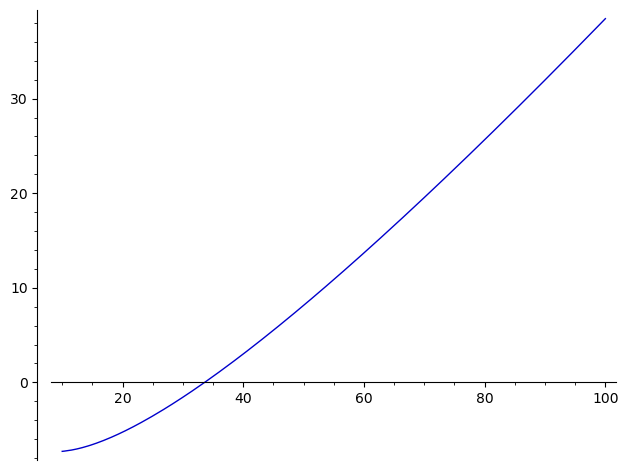

In [12]:
plot([x-4*sqrt(x)-x^(2/3)],x,10,100)

In [13]:
W_approx(N,n,S_n) = factorial(N-S_n-n) \
    /factorial(N-S_n-2*n+1) \
    *factorial(N-n+1-(S_n-1)/2) \
    *factorial(N-n-S_n+2+(S_n-3)/2) \
    /factorial(N-n-S_n+2) \
    /factorial(N)
W_approx

(N, n, S_n) |--> factorial(N - 1/2*S_n - n + 3/2)*factorial(N - 1/2*S_n - n + 1/2)*factorial(N - S_n - n)/(factorial(N - S_n - n + 2)*factorial(N - S_n - 2*n + 1)*factorial(N))

In [14]:
[numerical_approx(sum([sum(W_approx(N,n,S_n),S_n,1,floor(N^(2/3))) for n in [1..floor(2*sqrt(N))]])) for N in [50,100,200,400]]

[0.899149929386479, 0.933592420652810, 0.959953753700509, 0.975910201139807]

### Determining if relative standings change

Given that the winner is skater $n$, whose rank in the short program was $S_n$ and whose rank in the
free skate was $n$, what is the probability that she was not first in the overall rankings at some point
after finishing her free skate?

The winner could only be behind a skater that finished ahead of her in the short program and behind
her by more than one place in the free skate, with at least one of the skaters ranking between them
not having skated yet.

Let $C(N,n,S_n)$ the probability that was behind a skater in the overall standings some time after
finishing her free skate.  Then

$$ p_N = \sum_{n=1}^{N} \sum_{S_n=1}^{N} W(N,n,S_n)C(N,n,S_n) $$

The probability that skater $n+2$ was ahead in the overall rankings is the probability that $S_{n+2}/2 + 1 < S_n/2$
and that skater $n+1$ skates after both skater $n$ and $n+2$.  Since $S_{n+2}/2 + 2 \ge S_n/2$, that means $S_n - 4 \le S_{n+2} < S_n - 2$, so the first probability is $\min(2,\max(0,S_n-3))/(N-1)$.
There are 3!=6 relative skate orderings for skaters $n$, $n+1$, and $n+2$, and 2 of them have skater $n+1$ skating last, so the
probability that skater $n+2$ was ahead is $\min(2,\max(0,S_n-3))/(N-1)\cdot 2/6$.

In [15]:
C1(N,S_n) = 2/6*min_symbolic(2,max_symbolic(0,S_n-3))/(N-1)

The probability that skater $n+3$ was ahead in the overall rankings is the probability that
$S_{n+3}/2+1 < S_n/2$ and that enough of skaters $n+1$ and $n+2$ skate after both skater $n$ and $n+3$.
Since $S_{n+3}/2 + 3 \ge S_n/2$, that means $S_n - 6 \le S_{n+3} < S_n - 2$.  If $S_{n+3} = S_n-6$ or $S_{n+3} = S_n-5$,
both skaters $n+1$ and $n+2$ have to skate after both skaters $n$ and $n+3$.  If $S_{n+3} = S_n-4$ or $S_{n+3} = S_n-3$,
at least one of skaters $n+1$ and $n+2$ must skate after both skaters $n$ and $n+3$.  There are 4!=24 relative
skate orderings, and 4 of them have both $n+1$ and $n+2$ as the last 2, and $2\cdot3!=12$ have have at least one
of them last.  So the probability that skater $n+3$ was ahead is
$\min(2,\max(0,S_n-5))/(N-1)\cdot 4/24 + \min(2,\max(0,S_n-3))/(N-1)\cdot 12/24$.

In [16]:
C2(N,S_n) = 4/24*min_symbolic(2,max_symbolic(0,S_n-5))/(N-1) + 12/24*min_symbolic(2,max_symbolic(0,S_n-3))/(N-1)

C1(4,4) is wrong, since it should be 1/4, not 1/9, if it is to agree with the brute-force answer.

In [17]:
[(W(4,1,S_n),C1(4,S_n)) for S_n in [1..4]]

[(1/4, 0), (1/4, 0), (1/4, 0), (1/6, 1/9)]

### Fail
It's getting complicated and I'm not seeing where assuming $N$ is large can simplify things, so I'm giving up.

### Probability of winning after being behind after skating
I'll try to calculate the probability that skater $n$ wins having been out of the first place after skating, $P(n,S_n)$.  Then
$$  p_N = \sum_{n=1}^{N} \sum_{S_n=1}^{N} P(n,S_n)
        \approx \sum_{n=1}^{2\sqrt{N}} \sum_{S_n=1}^{N^{2/3}} P(n,S_n)
$$

Let $R(n,i)$ be the probability that skater $i$ finishes ahead of skater $n$ or skater $i$ is never ahead of skater $n$
in the overall standings, given that skaters $j$, where $j < i$, either finish ahead of skater $n$ or is never ahead
of skater $n$.

When $i$ < $n$, if skater $i$ does not finish ahead of skater $n$, that means $S_i > S_n$, so skater $i$ also cannot
have been ahead of skater $n$ in the overall standings.  Also, for skater $j > i$, we know that $S_i > S_n$.

When $i$ > $n$, if skater $i$ does not finish ahead of skater $n$, but could have been ahead of skater $n$ depending
on the skate order, that means $S_i$ must be in a specific range.  We know that $S_j$, when $j < n$, cannot be in that
range.  However, $S_j$, when $n < j < i$, might be in that range, or might not, and that correlation seems too complicated
to figure out.  I'll just wave my hands and claim that, when $N$ is large, the probability that $S_j$ is in that range
can be ignored.

$$\begin{aligned}
    P(n) &= 1 - Q(n,1) \\
    Q(n,i) &= R(n,i) + (1-R(n,i)) Q(n,i+1) \\
    R(n,n) &= 0 \\
    R(n,N+m) &= 0, \text{when } m \ge 1 \\
\end{aligned}$$

When $i < n$, the probability that skater $i$ finishes behind skater $n$ but was ahead of skater $n$ at some point is 0.
The probability that skater $i$ finishes ahead of skater $n$ is the probability that $i + S_i/2 \le n + S_n/2$, or the
probability that $S_i \le 2(n-i) + S_n$.  We already know that $S_j > (n-j) + S_n$ for $j < i$, so there are $N-i$
(all the skaters except skaters $1$ through $i-1$ and skater $n$) possibilities and $2(i-n)+S_n$ of them result in
skater $i$ finishing ahead of skater $n$, so

$$ R(n,i) = \frac{2(i-n)+S_n}{N-i}, \text{when } i < n $$

When $i > n$, skater $i$ finishes ahead of skater $n$ is the probability that $i + S_i/2 < n + S_n/2$, or the
probability that $S_i < S_n - 2(i-n)$.  We already know that $S_j$, when $j < n$ cannot be in that range.
We'll claim that the probability that $S_j$, when $n < j < i$, is in that range can be ignored when $N$ is large.
So the probability that skater $i$ finishes ahead of skater $n$ is approximately $\frac{S_n - 2(n-i) - 1}{N-i-1}$.

If skater $i$ finishes behind skater $n$ but was ahead of skater $n$ at some point, then $n + 1 + S_i/2 < n + S_n/2$
and $i + S_i/2 < n + S_n/2$, so $S_n - 2(i-n) < S_i < S_n - 2$.  The probability of that is approximately
$\frac{\max(0,-2-1 -(-2(i-n))}{N-i-1} = \frac{\max(0,2(i-n)-3)}{N-i-1}$.  If $i = n+1$, then that is zero, so let's
just further stipulate that $i > n+1$, so that the probability is $\frac{2(i-n)-3}{N-i-1}$.  Given that $S_i$ in in
that range, then skater $i$ might have been ahead of skater $n$, depending on the skate order.

If $S_i = S_n-3$, then, of the $n-i-1$ skaters $n+1$ through $i-1$, at least one of them must skate after both of them
for $S_i$ to lead $S_n$.

If $S_i = S_n-4$ or $S_i = S_n-5$, at least two of skaters $n+1$ through $i-1$ must skate after both of them.

So, at least $\text{floor}((S_n-S_i)/2)$ skaters $n+1$ through $i-1$ must skate after both skater $i$ and skater $n$ for
skater $i$ to be ahead of skater $n$ then finish behind her.

The probability that $S_i$ is any one value, given that $S_j$, where $j < i$, already known to be greater than that value
or has a probability of being that value that we claim is small enough to be ignored, is approximately $1/(N-i-1)$.

Let $Z(n,i,k)$ be the probability that fewer than $k$ of skaters $n+1$ through $i-1$ skate after both $i$ and $n$.

$$ R(n,i) = \frac{S_n-2(n-1)-1 + \sum_{S_i=S_n-\text{floor}((i-n-1)/2)}^{S_n-3} Z(n,i,\text{floor}((S_n-S_i)/2)}{N-i-1} $$


For, $Z(n,i,k)$ there are $i-n+1$ skaters who can be ordered in $(i-n+1)!$ ways.  The skaters can be divided into
two groups, one with skaters $i$ and $n$, the other with the rest.  The $Z$ is the probability that at least one
of the two in the first group is one of the last $k$, so

$$\begin{aligned}
    Z(n,i,k) &= \frac{2}{i-n+1} + \frac{i-n+1-2}{i-n+1} Z(n,i-1,k-1) \\
    Z(n,i,k) &= 0, \text{when } k > i-n-1 \\
\end{aligned}$$

In [18]:
maxima('load("solve_rec")')
maxima('solve_rec(Z[k+1] - 2/(i+k-n+1) - (i+k-n-1)/(i+k-n+1)*Z[k] = 0, Z[k], Z[0] = 0)')

Z[k] = -(k*(2*n-k-2*i+1))/((n-k-i)*(n-k-i+1))

I think that means

In [19]:
Z(n,i,k) = k*(2*i-2*n-k+1)/((i-n)*(i-n+1))
Z

(n, i, k) |--> (2*i - k - 2*n + 1)*k/((i - n + 1)*(i - n))

In [20]:
(Z(n,i,k) - 2/(i-n+1) - (i-n-1)/(i-n+1)*Z(n,i-1,k-1)).simplify_full()

0

Splitting $R$ into $R_a$ and $R_b$ where $R = R_a$ when $i < n$ and $R = R_b$ when $i > n$,

In [21]:
R_a(N,n,S_n,i) = (2*(i-n)+S_n)/(N-i)
R_a

(N, n, S_n, i) |--> (S_n + 2*i - 2*n)/(N - i)

In [22]:
R_b(N,n,S_n,i) = (S_n - 2*(n-1) - 1 + sum(Z(n,i,floor((S_n-k)/2)),k,S_n-floor((i-n-1)/2),S_n-3))/(N-i-1)
R_b

(N, n, S_n, i) |--> (S_n - 2*n - sum((2*i + 1)*ceil(-1/2*S_n + 1/2*k) - 2*n*ceil(-1/2*S_n + 1/2*k) + ceil(-1/2*S_n + 1/2*k)^2, k, S_n + ceil(-1/2*i + 1/2*n + 1/2), S_n - 3)/(i^2 - (2*i + 1)*n + n^2 + i) + 1)/(N - i - 1)

The probability that skater $n$ finishes behind at least one skater $j$, where $j < n$,
is

$$ R_a(1) + (1-R_a(1))\left(R_a(2) + (1-R_a(2))\left(R_a(3) + \cdots R_a(n-1) \right) \right) $$

That can be expressed as a recurrence relation, where I mangled the names to make the
signs work out,

In [23]:
maxima('solve_rec(Qa[Ci+1] - (2*Ci+S_n)/(aN-Bn+Ci) - (1-(2*Ci+S_n)/(aN-Bn+Ci))*Qa[Ci] = 0, Qa[Ci], Sa[0] = 0)')

Qa[Ci] = ((aN-S_n-Ci-Bn)*factorial(aN+Ci-Bn)*factorial(aN-S_n-Ci-Bn-1)) /((aN+Ci-Bn)*factorial(aN+Ci-Bn-1)*factorial(aN-S_n-Ci-Bn)) -((aN-S_n-Bn)*factorial(aN-Bn)*factorial(aN-S_n-Bn-1)) /((aN-Bn)*factorial(aN+Ci-Bn-1)*factorial(aN-S_n-Ci-Bn))

The term of interest is $C_i = n-1$, so

$$ Qa(n-1) = 1 - \frac{(N-S_n-n)!(N-n-1)!}{(N-2)!(N-S_n-2n+1)!} $$

It's zero when $n = 1$, so that checks out, and it's $1/(N-2)$ when $n = 2$ and $S_2 = 1$, which must be
the probability that $S_1 = 2$, so that also checks out.

Then, there's also a recurrence relation for the skaters $n+1$ to $N$.

$$ Qb(i+1) = Rb(N-i) + (1-Rb(N-i)) Qb(i) $$

In [24]:
R_b(N,n,S_n,i)

(S_n - 2*n - sum((2*i + 1)*ceil(-1/2*S_n + 1/2*k) - 2*n*ceil(-1/2*S_n + 1/2*k) + ceil(-1/2*S_n + 1/2*k)^2, k, S_n + ceil(-1/2*i + 1/2*n + 1/2), S_n - 3)/(i^2 - (2*i + 1)*n + n^2 + i) + 1)/(N - i - 1)

This is way too complicated, so try to come up with some super hand-wavy simplifications for large $N$.